# Importing Basic Dependencies

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [10]:
df = pd.read_csv('/content/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [11]:
df.shape

(20800, 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [13]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [14]:
df.drop(columns = ['id','text','author'],inplace=True)

In [15]:
df.head()

,title,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You Fired,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1


In [16]:
df['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [17]:
df.isnull().sum()

title    558
label      0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20242 non-null  object
 1   label   20800 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 325.1+ KB


In [19]:
#drop null values

df.dropna(inplace=True)

In [20]:
df.head()

,title,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You Fired,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1


In [21]:
df.shape

(20242, 2)

In [22]:
df.duplicated().sum()

439

In [23]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [24]:
df.shape

(19803, 2)

# EDA

In [25]:
df['label'].value_counts()

0    10381
1     9422
Name: label, dtype: int64

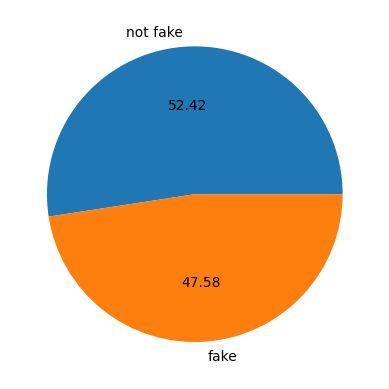

In [26]:
plt.pie(df['label'].value_counts(), labels=['not fake','fake'],autopct="%0.2f")
plt.show()

In [27]:
import nltk

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
df['num_characters'] = df['title'].apply(len)

In [30]:
df.head()

,title,label,num_characters
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,81
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0,55
2,Why the Truth Might Get You Fired,1,33
3,15 Civilians Killed In Single US Airstrike Hav...,1,63
4,Iranian woman jailed for fictional unpublished...,1,93


In [31]:
# num of words
df['num_words'] = df['title'].apply(lambda x:len(nltk.word_tokenize(x)))

In [32]:
df.head()

,title,label,num_characters,num_words
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,81,19
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0,55,11
2,Why the Truth Might Get You Fired,1,33,7
3,15 Civilians Killed In Single US Airstrike Hav...,1,63,10
4,Iranian woman jailed for fictional unpublished...,1,93,14


In [33]:
df['num_sentences'] = df['title'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [34]:
df.head()

,title,label,num_characters,num_words,num_sentences
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,81,19,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0,55,11,1
2,Why the Truth Might Get You Fired,1,33,7,1
3,15 Civilians Killed In Single US Airstrike Hav...,1,63,10,1
4,Iranian woman jailed for fictional unpublished...,1,93,14,1


In [35]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,19803.000000,19803.000000,19803.000000
mean,74.579912,14.202242,1.101853
std,23.054653,4.908809,0.358681
min,3.000000,1.000000,1.000000
25%,61.000000,11.000000,1.000000
50%,76.000000,14.000000,1.000000
75%,88.000000,17.000000,1.000000
max,456.000000,79.000000,7.000000


In [36]:
# Not Fake
df[df['label'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,10381.000000,10381.000000,10381.000000
mean,79.609961,15.579135,1.114151
std,15.556547,3.702525,0.390855
min,22.000000,5.000000,1.000000
25%,70.000000,13.000000,1.000000
50%,81.000000,16.000000,1.000000
75%,89.000000,18.000000,1.000000
max,175.000000,35.000000,5.000000


In [37]:
# Fake
df[df['label'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,9422.000000,9422.000000,9422.000000
mean,69.037890,12.685205,1.088304
std,28.141747,5.581524,0.318973
min,3.000000,1.000000,1.000000
25%,51.000000,9.000000,1.000000
50%,67.000000,12.000000,1.000000
75%,84.000000,16.000000,1.000000
max,456.000000,79.000000,7.000000


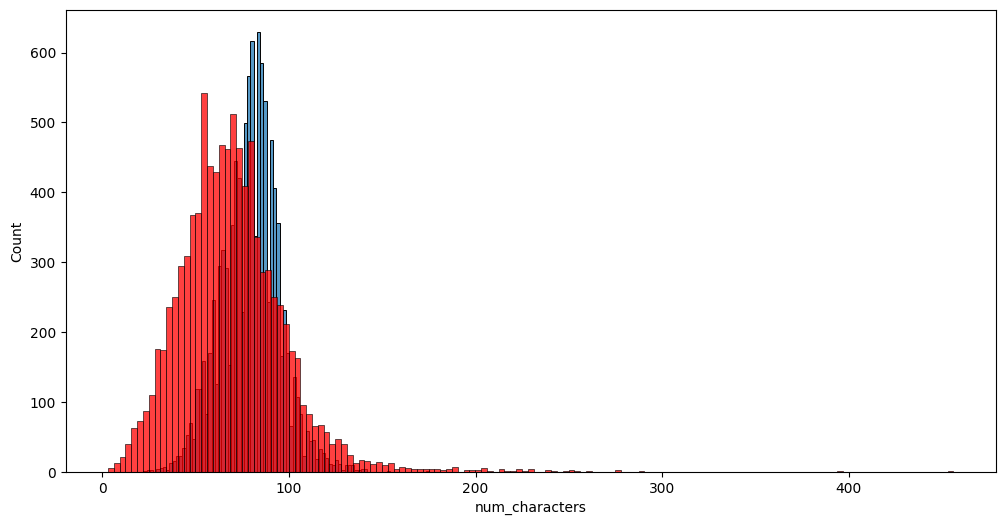

In [38]:
# characters

plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_characters'])
sns.histplot(df[df['label'] == 1]['num_characters'],color='red')
plt.show()

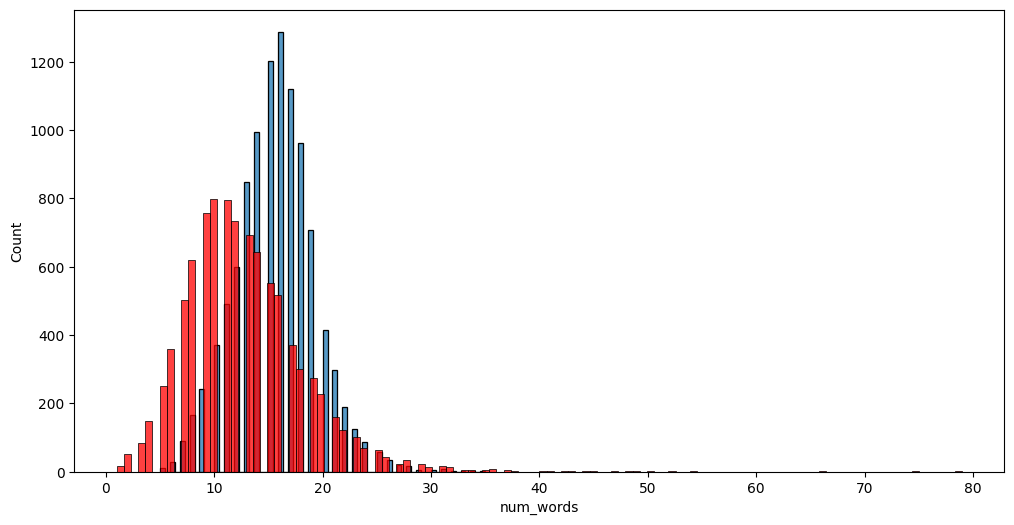

In [39]:
# words
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'],color='red')
plt.show()

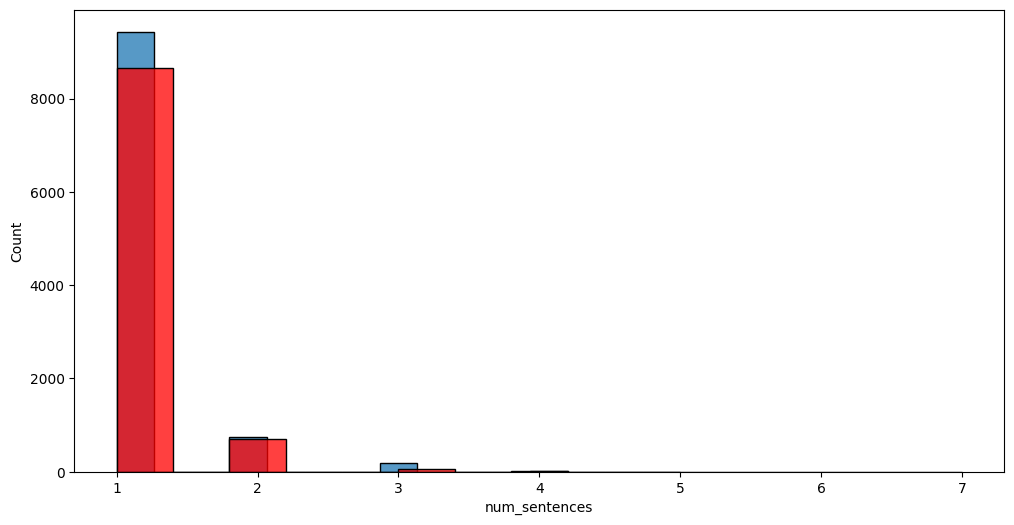

In [40]:
# sentences
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_sentences'])
sns.histplot(df[df['label'] == 1]['num_sentences'],color='red')
plt.show()

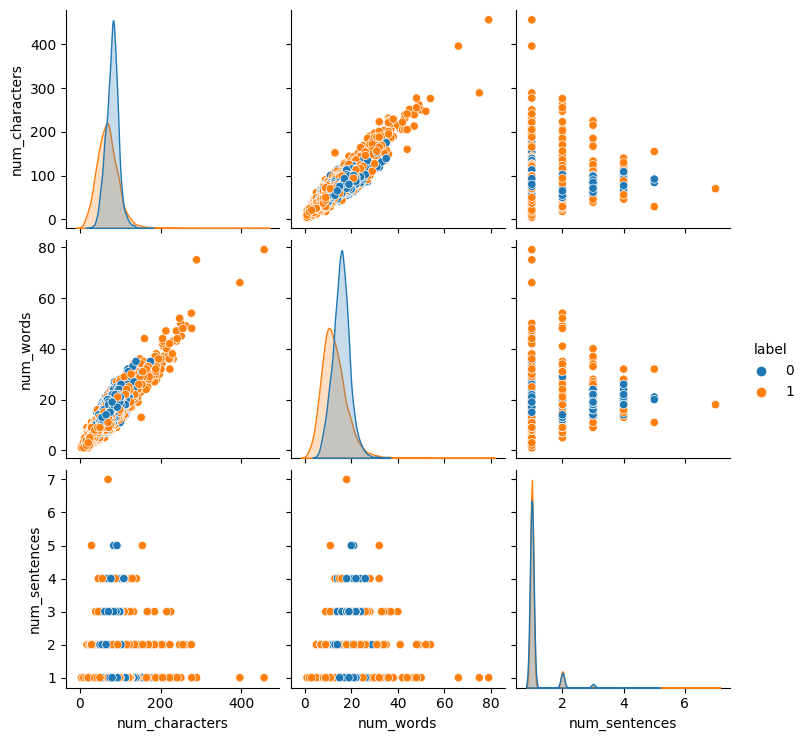

In [41]:
sns.pairplot(df,hue='label')
plt.show()

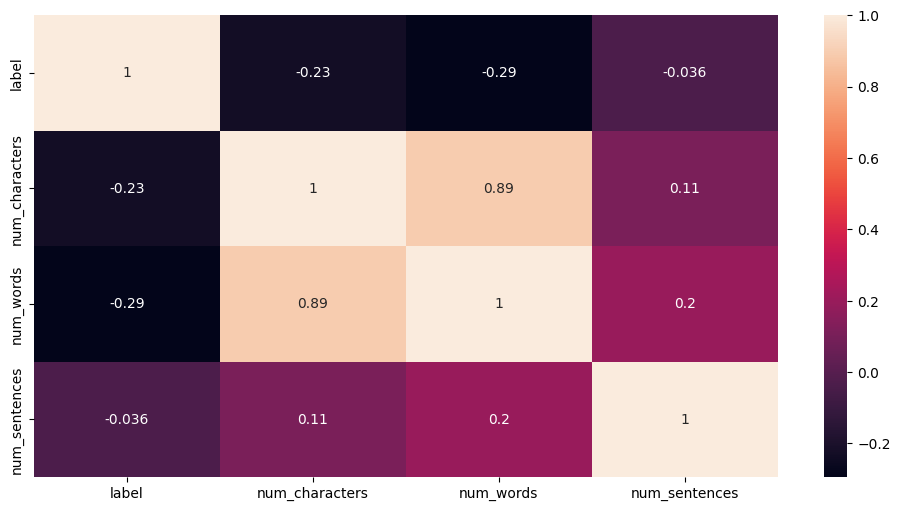

In [42]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Data preprocessing

In [43]:
import nltk
import re
from nltk.corpus import stopwords
import string

In [44]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [46]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum(): #remove special charactes except alphanumeric
            y.append(i)
    
    text = y[:]
    y.clear()
    
    #remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: 
            y.append(i)
            
    text = y[:]
    y.clear()
    
    #word stemming
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [47]:
transform_text("We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey.")

'even see comey letter jason chaffetz tweet darrel lucu octob 30 2016 subscrib jason chaffetz stump american fork utah imag courtesi michael jolley avail creativ licens apolog keith olbermann doubt worst person world director jame comey'

In [48]:
df['transformed_text'] = df['title'].apply(transform_text)

In [49]:
df.head()

,title,label,num_characters,num_words,num_sentences,transformed_text
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,81,19,1,hous dem aid even see comey letter jason chaff...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0,55,11,1,flynn hillari clinton big woman campu breitbart
2,Why the Truth Might Get You Fired,1,33,7,1,truth might get fire
3,15 Civilians Killed In Single US Airstrike Hav...,1,63,10,1,15 civilian kill singl us airstrik identifi
4,Iranian woman jailed for fictional unpublished...,1,93,14,1,iranian woman jail fiction unpublish stori wom...


In [46]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [51]:
fake_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))

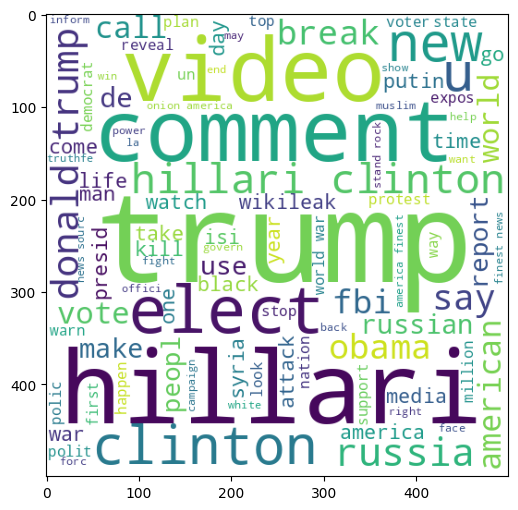

In [52]:
plt.figure(figsize=(18,6))
plt.imshow(fake_wc)
plt.show()

In [53]:
not_fake_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))

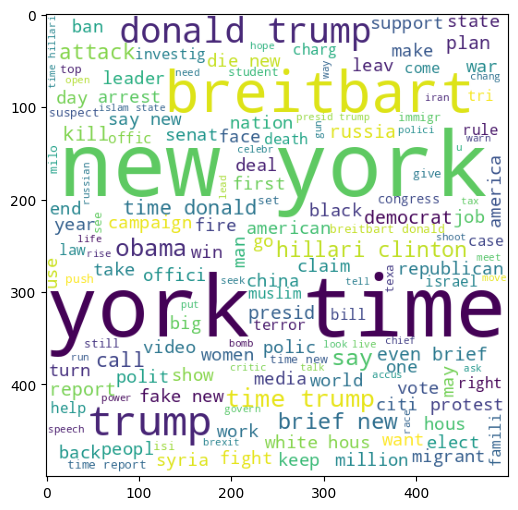

In [54]:
plt.figure(figsize=(18,6))
plt.imshow(not_fake_wc)
plt.show()

In [55]:
fake_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        fake_corpus.append(word)

In [56]:
len(fake_corpus)

72182

In [57]:
from collections import Counter

In [58]:
Counter(fake_corpus).most_common(30)

[('trump', 1362),
 ('hillari', 962),
 ('clinton', 887),
 ('elect', 533),
 ('new', 413),
 ('video', 381),
 ('us', 375),
 ('news', 337),
 ('comment', 336),
 ('russia', 325),
 ('fbi', 323),
 ('war', 315),
 ('email', 297),
 ('america', 289),
 ('vote', 283),
 ('world', 270),
 ('obama', 268),
 ('donald', 259),
 ('say', 222),
 ('break', 203),
 ('american', 201),
 ('day', 198),
 ('de', 185),
 ('state', 182),
 ('presid', 181),
 ('wikileak', 177),
 ('support', 171),
 ('campaign', 170),
 ('2016', 164),
 ('report', 161)]

In [59]:
d1 = pd.DataFrame(Counter(fake_corpus).most_common(30))[0]

In [60]:
d1.head()

0      trump
1    hillari
2    clinton
3      elect
4        new
Name: 0, dtype: object

In [61]:
d2 = pd.DataFrame(Counter(fake_corpus).most_common(30))[1]

In [62]:
d2.head()

0    1362
1     962
2     887
3     533
4     413
Name: 1, dtype: int64

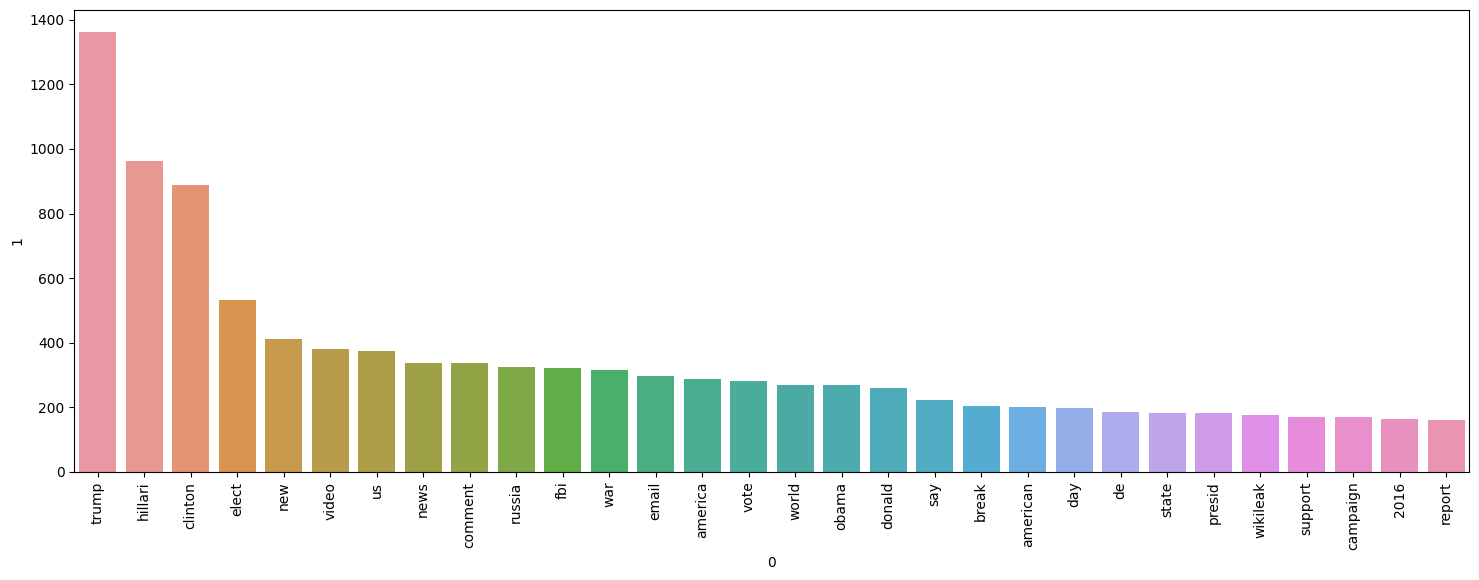

In [63]:
plt.figure(figsize = (18,6))
sns.barplot(x=d1,y=d2)
plt.xticks(rotation='vertical')
plt.show()

In [64]:
not_fake_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        not_fake_corpus.append(word)

In [65]:
len(not_fake_corpus)

96764

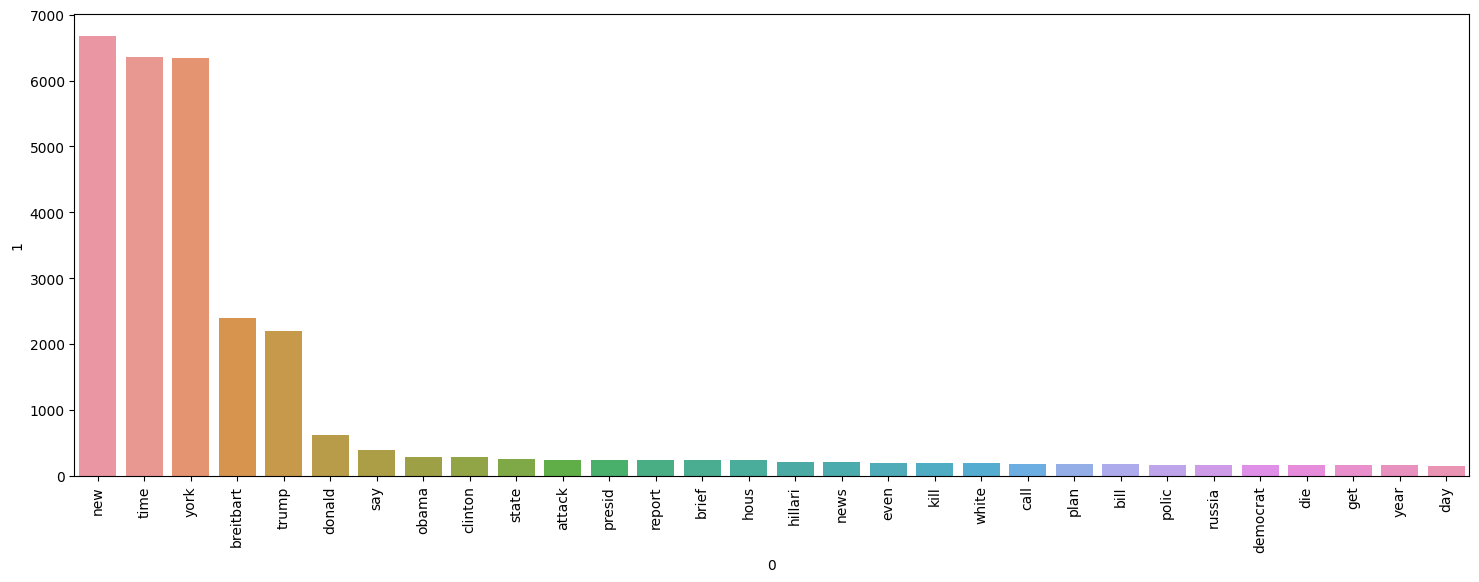

In [66]:
plt.figure(figsize = (18,6))
sns.barplot(x=pd.DataFrame(Counter(not_fake_corpus).most_common(30))[0],y=pd.DataFrame(Counter(not_fake_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## model building

In [67]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [68]:
df.shape

(19803, 6)

In [69]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [70]:
X.shape

(19803, 15974)

In [71]:
y = df['label'].values

In [72]:
y

array([1, 0, 1, ..., 0, 0, 1])

In [73]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [76]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [77]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [78]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.6387275940419086
[[1940  202]
 [1229  590]]
0.7449494949494949


In [79]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.8684675586972986
[[2065   77]
 [ 444 1375]]
0.946969696969697


In [80]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9247664731128503
[[1950  192]
 [ 106 1713]]
0.8992125984251969


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [82]:
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [83]:
clfs = {
    'SVC' : svc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'GBDT':gbdt,
    'xgb':xgb
}

In [84]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [85]:
train_classifier(dtc,X_train,y_train,X_test,y_test)

(0.9149204746276193, 0.8501890359168242)

In [86]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9308255491037617
Precision -  0.8845196615231459
For  NB
Accuracy -  0.8684675586972986
Precision -  0.946969696969697
For  DT
Accuracy -  0.9149204746276193
Precision -  0.8501890359168242
For  LR
Accuracy -  0.9260287806109568
Precision -  0.8743866535819431
For  RF
Accuracy -  0.9371370865942944
Precision -  0.8936810431293881
For  AdaBoost
Accuracy -  0.9199697046200455
Precision -  0.8677766895200784
For  GBDT
Accuracy -  0.9134057056298914
Precision -  0.8442164179104478
For  xgb
Accuracy -  0.9252713961120929
Precision -  0.8691226369365003


In [87]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [88]:
performance_df

,Algorithm,Accuracy,Precision
1,NB,0.868468,0.946970
4,RF,0.937137,0.893681
0,SVC,0.930826,0.884520
3,LR,0.926029,0.874387
7,xgb,0.925271,0.869123
5,AdaBoost,0.919970,0.867777
2,DT,0.914920,0.850189
6,GBDT,0.913406,0.844216


In [89]:
import pickle
pickle.dump(tfidf,open('vectorizer1.pkl','wb'))
pickle.dump(rfc,open('model1.pkl','wb'))